# Data Science with Python 
# Final Exam  -  Practice

## LA County Restaurant Inspections and Violations

In [1]:
%autosave 0

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the data

In [3]:
import pandas as pd
import seaborn as sns
df_i = pd.read_csv("inspections.csv")
df_v = pd.read_csv("violations.csv")

In [4]:
pd.set_option('display.max_columns',100)

### Data Content
The data covers health code inspections (inspections.csv) and health code violations (violation.csv). More details about the two files is provided in the sections below.


#### Inspections
This dataset contains Environmental Health Violations for Restaurants and Markets in Los Angeles County. Each row represents one inspection result.

The Activity Date, Record ID, and Serial Number are the primary keys to review the violations (Violations Dataset).

All rows with the same Activity Date, Record ID, and Serial Number are part of the same violation.

In [5]:
df_i.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


#### Violations
Each row represents one health code violation.
The Serial Number is the primary key to review the inspection grade (Inspection Result dataset).

In [6]:
df_v.head()

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


## Q1 (5 pts)

### Q1.1, How many rows of data in violations.csv ? 

In [7]:
len(df_v)

906014

### Q1.2, What's the row and column counts in inspections.csv ? 

In [8]:
df_i.shape

(191371, 20)

Or ..

In [9]:
print('row counts: %d' % len(df_i))
print('column counts: %d' % len(df_i.columns))

row counts: 191371
column counts: 20


## Q2 (5 pts)

### Q2.1,  Any missing data in these two .csv files ? 

In [10]:
df_i.isna().any()
df_v.isna().any()

activity_date          False
employee_id            False
facility_address       False
facility_city          False
facility_id            False
facility_name          False
facility_state         False
facility_zip           False
grade                  False
owner_id               False
owner_name             False
pe_description         False
program_element_pe     False
program_name            True
program_status         False
record_id              False
score                  False
serial_number          False
service_code           False
service_description    False
dtype: bool

points                   False
serial_number            False
violation_code           False
violation_description    False
violation_status         False
dtype: bool

In [11]:
print ("Yes, there is missing data in one of these two .csv files.")

Yes, there is missing data in one of these two .csv files.


### Q2.2,  Which one has missing data and what's the missing count ? 

In [12]:
df_i.isna().sum()

activity_date            0
employee_id              0
facility_address         0
facility_city            0
facility_id              0
facility_name            0
facility_state           0
facility_zip             0
grade                    0
owner_id                 0
owner_name               0
pe_description           0
program_element_pe       0
program_name           402
program_status           0
record_id                0
score                    0
serial_number            0
service_code             0
service_description      0
dtype: int64

In [13]:
print ("inspections.csv has %d NaN value" % df_i.isna().sum().sum())

inspections.csv has 402 NaN value



## Q3 (10 pts)

### Q3.1, In violation.csv file, how many different violation codes are there? 

In [14]:
df_v.head()

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [15]:
len(df_v.violation_code.unique())

116

Or...

In [16]:
len(df_v.groupby('violation_code')['violation_status'].size())

116

### Q3.2, How man different type of deduction points(the "points")? and what are they?

In [17]:
len(df_v.points.unique())

6

In [18]:
df_v.points.unique()

array([ 1,  4,  2,  0,  3, 11])

## Q4 (10 pts)

### Q4.1, In violation.csv file, what's the top 3 most frequently show up violation codes and how many times they show up? 

In [19]:
df_v.groupby('violation_code')['violation_status'].size().nlargest(3)

violation_code
F044    102012
F033    100083
F035     80020
Name: violation_status, dtype: int64

### Q4.2, What are the descriptions of the top 1 violation codes?

In [20]:
df_v[df_v.violation_code=='F044'].violation_description.values[0]

'# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean'

## Merge these two data sets as one data frame (named it *df* and use default *inner* merge). 
**Answer all questions below with this new data frame**

In [21]:
df=df_i.merge(df_v, on="serial_number", how='inner')

## Q5 (10 pts)

### Q5.1, What's the new data frame size ?

In [22]:
df.head(1)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,1,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE


In [23]:
len(df)

897374

### Q5.2, From violations.csv file point of view, how many rows had been dropped? and why?

In [24]:
df_right=df_i.merge(df_v, on="serial_number", how='right')

In [25]:
len(df_right) - len(df)

8640

In [26]:
df_right.isna().sum()

activity_date             8640
employee_id               8640
facility_address          8640
facility_city             8640
facility_id               8640
facility_name             8640
facility_state            8640
facility_zip              8640
grade                     8640
owner_id                  8640
owner_name                8640
pe_description            8640
program_element_pe        8640
program_name             10647
program_status            8640
record_id                 8640
score                     8640
serial_number                0
service_code              8640
service_description       8640
points                       0
violation_code               0
violation_description        0
violation_status             0
dtype: int64

The reason they got dropped is because there is no matching serial_number.

## Q6 (10 pts)

### Q6.1, What's the deduction points count distribution(each point showed up how many times)?

In [27]:
df.groupby('points')['points'].size()

points
0       9271
1     681095
2     160419
3       1212
4      44288
11      1089
Name: points, dtype: int64

### Q6.2,  Plot a bar chart to show the counts. 

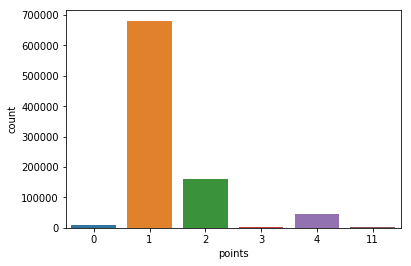

In [28]:
sns.countplot(x='points', data=df)

## Q7 (15 pts)

### Q7.1, How many different facility (name) are in this data set?

In [29]:
df.groupby('facility_name')['facility_name'].count().head()

facility_name
"R" KITCHEN             33
#1 BUFFET               63
#1 CAFE                 37
#1 CHINESE FAST FOOD    27
#1 DELICIOUS DONUTS     14
Name: facility_name, dtype: int64

In [30]:
len(df.groupby('facility_name')['facility_name'].count())

36341

### Q7.2, What's the most frequently show up facility name and how many time it show up?

In [31]:
df.groupby('facility_name')['facility_name'].count().nlargest(1)

facility_name
SUBWAY    1636
Name: facility_name, dtype: int64

### Q7.3, For this most frequently show up facility name, total how many different stores it has? 

In [32]:
df[df.facility_name=='SUBWAY'].groupby('facility_address')['facility_address'].count().head()

facility_address
10118 SAN FERNANDO RD STE 1        19
1020 E VALLEY BLVD                 10
10250 SANTA MONICA BLVD STE 167     5
10601 VALLEY BLVD #B                9
10921 ATLANTIC AVE                  9
Name: facility_address, dtype: int64

In [33]:
len(df[df.facility_name=='SUBWAY'].groupby('facility_address')['facility_address'].count())

131

Or ...

In [34]:
len(df[df.facility_name == 'SUBWAY']['facility_id'].unique())

131

## Q8 (15 pts)

### Q8.1, What is the highest total count of violation_code had been given to one single inspection?
(Hint:consider serial_number and facility_address)

In [35]:
df.groupby(['serial_number','facility_address'])['violation_code'].count().nlargest(1)

serial_number  facility_address         
DAELDAETV      940 E DOMINGUEZ ST STE #A    27
Name: violation_code, dtype: int64

In [36]:
df.groupby(['serial_number','facility_address'])['violation_code'].count().nlargest(1).values[0]

27

### Q8.2, What is the highest total points got deducted in a single inspection?

In [37]:
df.groupby(['serial_number','facility_address'])['points'].sum().nlargest(1)

serial_number  facility_address    
DAREI9PD0      888 E DOMINGUEZ ST E    46
Name: points, dtype: int64

### Q8.3, Is the answer above two questions point to the same facility? List the facility name(s).

In [38]:
print('No!')

No!


In [39]:
df[df.serial_number=='DAELDAETV'].facility_name.values[0]

'PHO KING WAY NOODLES & GRILL'

In [40]:
df[df.serial_number=='DAREI9PD0'].facility_name.values[0]

'CARSON BUFFET'

Or use pure programming way is even better:

In [41]:
High_v_code=df.groupby(['serial_number','facility_address'])['violation_code'].\
    count().nlargest(1)

In [42]:
High_v_code_serial_number = High_v_code.reset_index().serial_number.values[0]

In [43]:
df[df.serial_number==High_v_code_serial_number].facility_name.values[0]

'PHO KING WAY NOODLES & GRILL'

## Q9 (10 pts)

### What's the top 3 facilities(per location) had been inspected most frequent? Report the name, address and the total counts.

(Hint1: There are facility with same name but in different locations. 2: Based on activity_date to do the count, 3: explore method .nunique() )

In [44]:
df.groupby(['facility_name','facility_address']).activity_date.nunique().nlargest(3)

facility_name                                          facility_address         
UNIVERSAL STUDIOS HOLLYWOOD                            100 UNIVERSAL CITY PLZ       68
DODGER STADIUM                                         1000 VIN SCULLY AVE          49
SIX FLAGS MAGIC MOUNTAIN & SIX FLAGS HURRICANE HARBOR  26101 MAGIC MOUNTAIN PKWY    48
Name: activity_date, dtype: int64

Verify ...

In [45]:
df[df.facility_name=='UNIVERSAL STUDIOS HOLLYWOOD'].activity_date.describe()

count            417
unique            68
top       2017-12-13
freq              19
Name: activity_date, dtype: object

## Q10 (10 pts)

### Q10.1, For each DOMINO'S PIZZA facility, compute the max, min, gap(between max and min) of score being given. Rename the gap as 'spread'. List the first 5 stores only.

In [46]:
df_Domino=df[df.facility_name=='DOMINO\'S PIZZA']

In [47]:
df_Domino.head(1)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description,points,violation_code,violation_description,violation_status
426,2017-03-22,EE0000207,26500 W AGOURA RD STE 104,CALABASAS,FA0019159,DOMINO'S PIZZA,CA,91302,A,OW0035963,TIMOTHY L BEHM INC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,DOMINO'S PIZZA,ACTIVE,PR0046737,94,DAMM79FFV,1,ROUTINE INSPECTION,1,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE


In [48]:
df_spread=df_Domino.groupby('facility_address')['score'].agg(['max','min',\
        lambda x:x.max()-x.min()]).rename(columns={'<lambda>':'spread'})
df_spread[0:5]

,max,min,spread
facility_address,,,
1001 E LAS TUNAS DR,94,94,0
1007 TRUMAN ST,96,96,0
10652 RIVERSIDE DR,98,95,3
10948 E IMPERIAL HWY STE #104,94,91,3
110 W FOOTHILL BLVD,97,95,2


### Q10.2, Which store has the largest score spread? List the facility address and the spread.

In [49]:
df_spread.spread.nlargest(1)

facility_address
8662 LINDLEY AVE    14
Name: spread, dtype: int64

## Q11 (Extra credit 10 pts)

### How many different location facilities had been checked each month? Plot a bar chart for it. 

(Hint: Use pd.cut(). Consider this data set covers 30 months exact. allow +- one day off) 

Need to convert the 'activity_date' into datetime64 format. Create a new column 'datetime' for it

In [50]:
df['datetime'] = pd.to_datetime(df['activity_date'])

In [51]:
df.datetime.sort_values().head()
df.datetime.sort_values().tail()

206673   2015-07-01
697672   2015-07-01
697673   2015-07-01
848785   2015-07-01
848784   2015-07-01
Name: datetime, dtype: datetime64[ns]

575355   2017-12-29
575356   2017-12-29
575357   2017-12-29
650421   2017-12-29
588444   2017-12-29
Name: datetime, dtype: datetime64[ns]

Use pd.cut( ..., 30) and create a new column 'date_cut30m'

In [52]:
df['date_cut30m']=pd.cut(df.datetime,30)

In [53]:
df.date_cut30m.describe()

count                                         897374
unique                                            30
top       (2016-05-30 09:36:00, 2016-06-29 19:12:00]
freq                                           38791
Name: date_cut30m, dtype: object

In [54]:
df.groupby('date_cut30m')['facility_address'].count()

date_cut30m
(2015-06-30 02:06:43.200000, 2015-07-31 09:36:00]    22582
(2015-07-31 09:36:00, 2015-08-30 19:12:00]           28202
(2015-08-30 19:12:00, 2015-09-30 04:48:00]           33153
(2015-09-30 04:48:00, 2015-10-30 14:24:00]           31228
(2015-10-30 14:24:00, 2015-11-30]                    24676
(2015-11-30, 2015-12-30 09:36:00]                    30601
(2015-12-30 09:36:00, 2016-01-29 19:12:00]           30214
(2016-01-29 19:12:00, 2016-02-29 04:48:00]           31567
(2016-02-29 04:48:00, 2016-03-30 14:24:00]           31242
(2016-03-30 14:24:00, 2016-04-30]                    31452
(2016-04-30, 2016-05-30 09:36:00]                    32751
(2016-05-30 09:36:00, 2016-06-29 19:12:00]           38791
(2016-06-29 19:12:00, 2016-07-30 04:48:00]           25213
(2016-07-30 04:48:00, 2016-08-29 14:24:00]           32031
(2016-08-29 14:24:00, 2016-09-29]                    34044
(2016-09-29, 2016-10-29 09:36:00]                    27812
(2016-10-29 09:36:00, 2016-11-28 19:12:00]  

Or use pandas plot.bar() or plot.line()

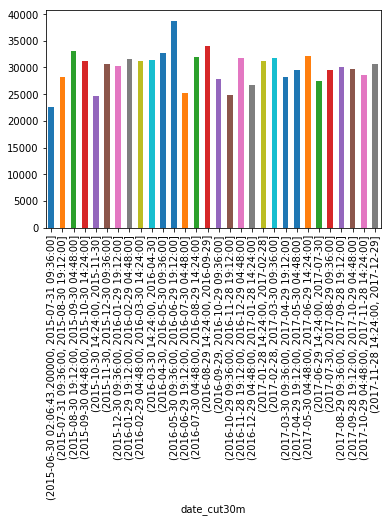

In [55]:
df.groupby('date_cut30m')['facility_address'].count().plot.bar()
#df.groupby('date_cut30m')['facility_address'].count().plot.line()

Or Seaborn's countplot

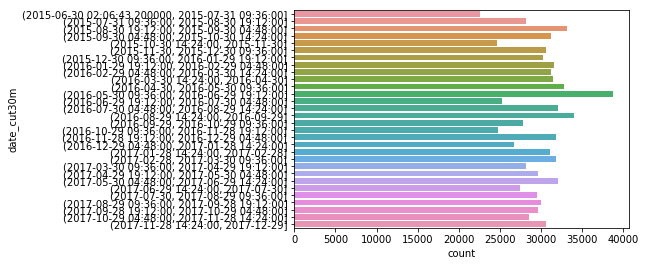

In [56]:
sns.countplot(y='date_cut30m',data=df)